# 모델링(Modeling)

## 1. 상관분석
- 상관계수 및 다중공선성 시각화
- `heatmap` 사용

In [1]:
# 라이브러리 호출
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import seaborn as sns
 
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 작업 디렉토리 확인
print(os.getcwd())

C:\Users\samsung\TIL\DS\project\miniPJ\01_pj\code


In [3]:
# 경로 변경
os.chdir('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/data/')

In [4]:
# 최종 concat data 불러오기
df_security_concat = pd.read_csv('./df_security_concat.csv', encoding='cp949')
df_security_concat.head()

,state,city,cctv_cnt,sclight_cnt,smalight_cnt,strlamp_cnt,crime_rate,avg_pop_density
0,강원도,강릉시,1699,12301,64,-4,0.0271,90.36
1,강원도,고성군,422,-2,94,-4,0.0271,90.36
2,강원도,동해시,330,4555,184,-4,0.0271,90.36
3,강원도,삼척시,932,7813,46,-4,0.0271,90.36
4,강원도,속초시,441,3118,-3,-4,0.0271,90.36


In [5]:
df_security_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            277 non-null    object 
 1   city             277 non-null    object 
 2   cctv_cnt         277 non-null    int64  
 3   sclight_cnt      277 non-null    int64  
 4   smalight_cnt     277 non-null    int64  
 5   strlamp_cnt      277 non-null    int64  
 6   crime_rate       277 non-null    float64
 7   avg_pop_density  277 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 17.4+ KB


## Heatmap 구현

### 1) state/요소별 heatmap
- 시도별 heatmap

####  시도별 데이터 분리

In [6]:
df_security_concat.state.unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [7]:
df_security_concat.columns

Index(['state', 'city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt',
       'strlamp_cnt', 'crime_rate', 'avg_pop_density'],
      dtype='object')

In [8]:
# 강원도
df_gw = df_security_concat.loc[df_security_concat.state == '강원도']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
0,강릉시,1699,12301,64,-4
1,고성군,422,-2,94,-4
2,동해시,330,4555,184,-4
3,삼척시,932,7813,46,-4
4,속초시,441,3118,-3,-4
5,양구군,296,190,22,-4
6,양양군,347,4391,40,-4
7,영월군,281,2,-3,-4
8,원주시,2820,10937,986,-4
9,인제군,280,2034,-3,-4


In [9]:
# import matplotlib.font_manager as fm

# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\1187650504.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


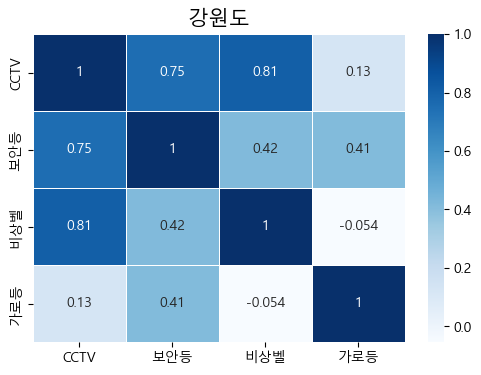

In [10]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('강원도')
plot_gw = plot_gw.set_title('강원도', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_gw.png')

In [11]:
# ['경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [12]:
# 경기도
df_gw = df_security_concat.loc[df_security_concat.state == '경기도']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
20,고양시,1945,12095,165,42
21,과천시,346,1118,195,-4
22,광명시,781,2251,121,-4
23,광주시,2609,13306,6596,7529
24,구리시,608,3241,23,-4
25,군포시,826,2616,781,-4
26,김포시,1394,499,956,19499
27,남양주시,4769,14346,2895,-4
28,동두천시,472,3161,434,-4
29,부천시,2052,19365,50,-4


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\4204957189.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


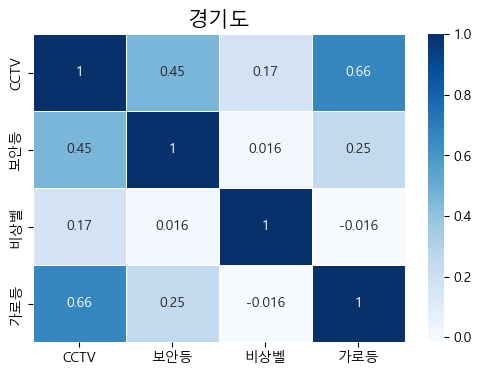

In [13]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('강원도')
plot_gw = plot_gw.set_title('경기도', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_gg.png')

In [14]:
# ['경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [15]:
# 경상남도
df_gw = df_security_concat.loc[df_security_concat.state == '경상남도']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
51,거제시,695,8557,75,-4
52,거창군,1975,6994,76,-4
53,고성군,383,5092,16,-4
54,김해시,4329,10960,333,-4
55,남해군,840,6154,56,-4
56,밀양시,809,10158,65,-4
57,사천시,2392,-2,59,-4
58,산청군,952,7611,18,-4
59,양산시,1464,6918,456,-4
60,의령군,759,5273,41,-4


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\2229024316.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


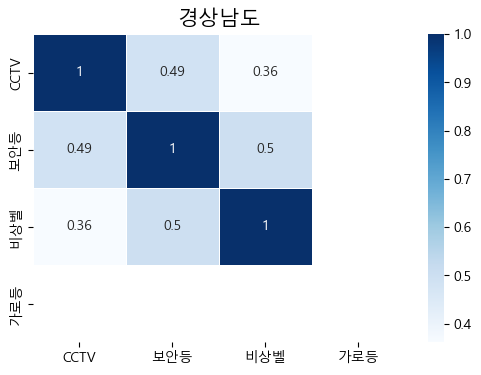

In [16]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('강원도')
plot_gw = plot_gw.set_title('경상남도', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_gn.png')

In [17]:
# ['경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [18]:
# 경상북도
df_gw = df_security_concat.loc[df_security_concat.state == '경상북도']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
71,경산시,894,13735,173,6008
72,경주시,2385,9870,67,5905
73,고령군,1054,-2,18,880
74,구미시,3771,15830,47,11181
75,군위군,6,131,-3,3446
76,김천시,2288,10000,20,6006
77,문경시,1942,763,-3,10596
78,봉화군,843,6137,11,4830
79,상주시,661,10000,82,2138
80,성주군,476,7507,6,5843


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\394370879.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


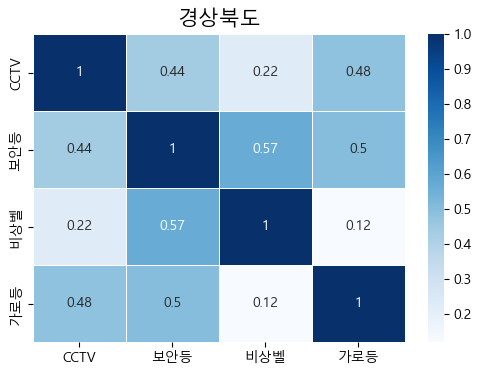

In [19]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('강원도')
plot_gw = plot_gw.set_title('경상북도', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_gb.png')

In [20]:
# ['광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [21]:
# 광주광역시
df_gw = df_security_concat.loc[df_security_concat.state == '광주광역시']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
95,광산구,726,10272,101,-4
96,남구,49,10854,16,3052
97,동구,81,3958,28,-4
98,북구,813,9913,48,6563
99,서구,51,7199,62,-4


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\556464351.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


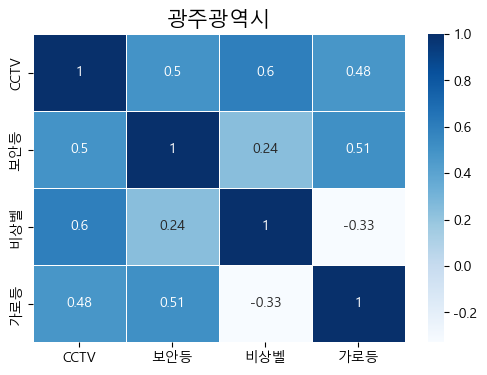

In [22]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('강원도')
plot_gw = plot_gw.set_title('광주광역시', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_gj.png')

In [23]:
# ['대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [24]:
# 대구광역시
df_gw = df_security_concat.loc[df_security_concat.state == '대구광역시']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
100,남구,882,7295,112,-4
101,달서구,1837,10047,63,-4
102,달성군,1583,9905,9,-4
103,동구,1294,14576,69,-4
104,북구,1943,10873,34,-4
105,서구,733,8880,24,-4
106,수성구,2471,11617,62,-4
107,중구,718,3919,31,-4


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\1031770591.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


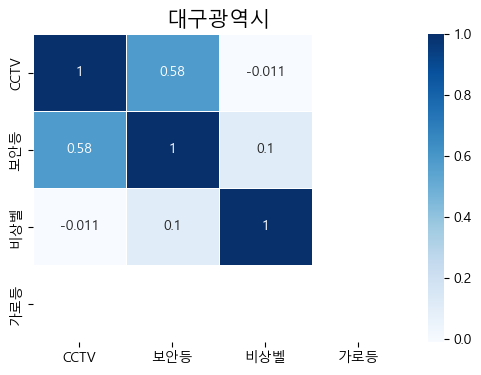

In [25]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('강원도')
plot_gw = plot_gw.set_title('대구광역시', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_dg.png')

In [26]:
# ['대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [27]:
# 대전광역시
df_gw = df_security_concat.loc[df_security_concat.state == '대전광역시']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
108,대덕구,893,8295,66,5824
109,동구,581,15122,-3,5790
110,서구,757,15407,67,9244
111,유성구,581,8595,72,17266
112,중구,738,12589,35,4958


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\1499392310.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


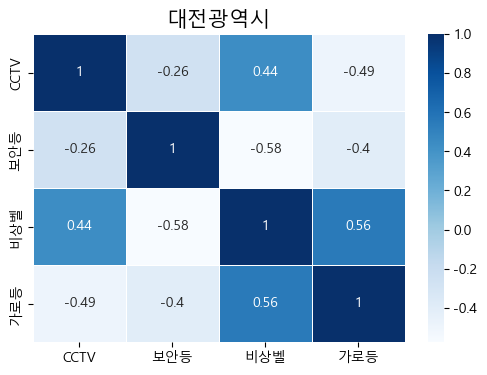

In [28]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('강원도')
plot_gw = plot_gw.set_title('대전광역시', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_dj.png')

In [29]:
# ['부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [30]:
# 부산광역시
df_gw = df_security_concat.loc[df_security_concat.state == '부산광역시']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
113,강서구,598,4750,-3,19623
114,금정구,35,4775,9,-4
115,기장군,1259,5613,81,11333
116,남구,1,4516,76,4453
117,동구,1318,3488,26,2900
118,동래구,1236,4495,40,4532
119,부산진구,1007,9379,24,-4
120,북구,746,3803,70,4521
121,사상구,442,3820,-3,-4
122,사하구,517,5549,-3,6042


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\4140094538.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


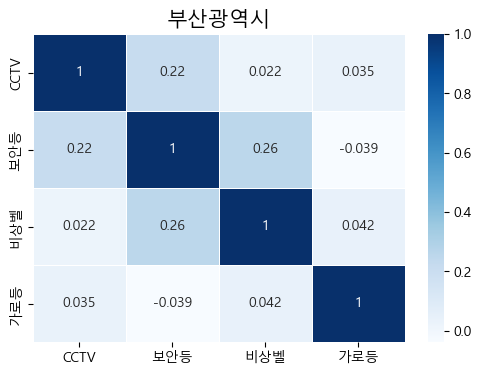

In [31]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('강원도')
plot_gw = plot_gw.set_title('부산광역시', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_bs.png')

In [32]:
# ['서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [33]:
# 서울특별시
df_gw = df_security_concat.loc[df_security_concat.state == '서울특별시']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
131,강남구,6186,10211,4231,-4
132,강동구,2813,7534,1037,-4
133,강북구,2300,9777,22,-4
134,강서구,1509,8646,898,-4
135,관악구,1662,12401,988,3026
136,광진구,923,8971,775,4715
137,구로구,1779,8015,1051,-4
138,금천구,778,6301,709,-4
139,노원구,2405,6791,59,-4
140,동대문구,904,-2,740,5205


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\1522017394.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


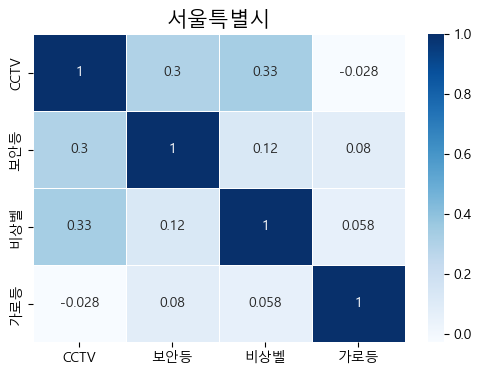

In [34]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('강원도')
plot_gw = plot_gw.set_title('서울특별시', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_s.png')

In [35]:
# ['세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [36]:
# 세종특별자치시
df_gw = df_security_concat.loc[df_security_concat.state == '세종특별자치시']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
156,가람동,5,-2,-3,-4
157,고운동,92,-2,1,178
158,공주시,2,-2,-3,-4
159,금남면,119,1380,2,2598
160,나성동,38,-2,-3,-4
161,다정동,26,-2,-3,-4
162,대평동,37,-2,2,-4
163,대평동,1,-2,-3,-4
164,도담동,40,-2,-3,160
165,반곡동,44,-2,-3,-4


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\3722427799.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


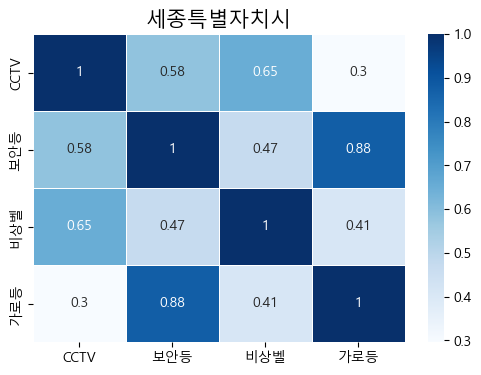

In [37]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('세종특별자치시')
plot_gw = plot_gw.set_title('세종특별자치시', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_sj.png')

In [38]:
# ['울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [39]:
# 울산광역시
df_gw = df_security_concat.loc[df_security_concat.state == '울산광역시']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
184,남구,3467,6314,807,-4
185,동구,1376,2504,454,-4
186,북구,762,4413,484,-4
187,울주군,731,14157,466,-4
188,중구,730,5082,730,-4
189,노원구,-1,-2,1,-4


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\1001578642.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


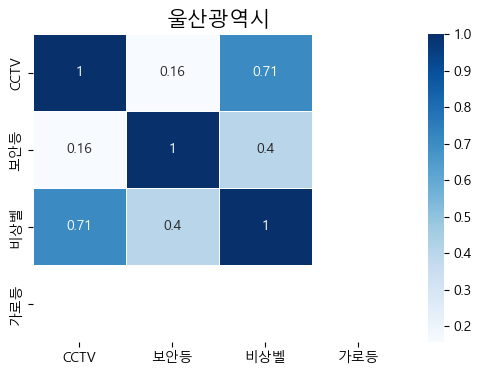

In [40]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('세종특별자치시')
plot_gw = plot_gw.set_title('울산광역시', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_us.png')

In [41]:
# ['인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [42]:
# 인천광역시
df_gw = df_security_concat.loc[df_security_concat.state == '인천광역시']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
190,강화군,743,9978,296,-4
191,계양구,1377,3378,554,-4
192,남동구,1147,6726,83,17820
193,동구,614,3057,289,-4
194,미추홀구,1812,9052,194,4407
195,부평구,946,7290,952,-4
196,서구,1382,5117,997,22540
197,연수구,688,1895,119,-4
198,옹진군,130,-2,11,2055
199,중구,658,2572,523,3230


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\78278461.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


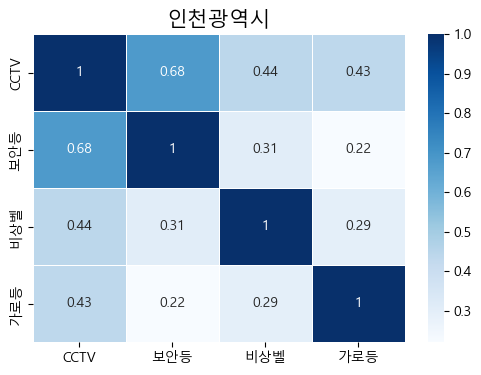

In [43]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('인천광역시')
plot_gw = plot_gw.set_title('인천광역시', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_ic.png')

In [44]:
# ['전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [45]:
# 전라남도
df_gw = df_security_concat.loc[df_security_concat.state == '전라남도']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
201,강진군,10,4446,10,-4
202,고흥군,815,-2,55,-4
203,곡성군,535,5334,23,3230
204,광양시,149,2069,93,-4
205,구례군,406,4028,42,-4
206,나주시,1,14326,-3,-4
207,담양군,167,6815,8,-4
208,목포시,628,9301,56,-4
209,보성군,1076,-2,49,-4
210,순천시,3137,9998,291,10725


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\3833055813.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


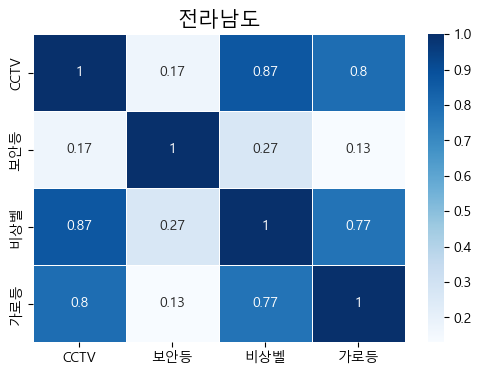

In [46]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('세종특별자치시')
plot_gw = plot_gw.set_title('전라남도', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_jn.png')

In [47]:
# ['전라북도', '제주특별자치도', '충청남도', '충청북도']

In [48]:
# 전라북도
df_gw = df_security_concat.loc[df_security_concat.state == '전라북도']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
225,고창군,409,2130,132,-4
226,군산시,2096,17676,69,16668
227,남원시,1,297,9,-4
228,무주군,858,3530,42,-4
229,부안군,307,8972,23,-4
230,순찬군,2,-2,-3,-4
231,순창군,247,6551,47,-4
232,완주군,421,12727,157,-4
233,익산시,904,18203,18,-4
234,임실군,478,4671,38,-4


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\3610564820.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


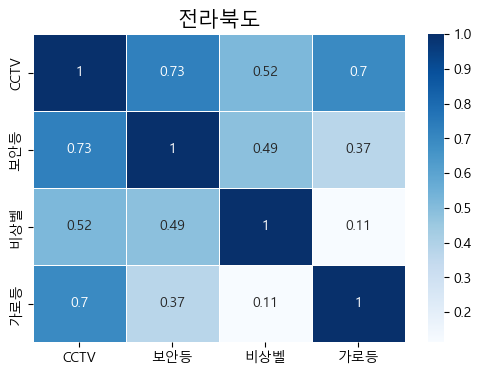

In [49]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('세종특별자치시')
plot_gw = plot_gw.set_title('전라북도', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_jb.png')

In [50]:
# ['제주특별자치도', '충청남도', '충청북도']

In [51]:
# 제주특별자치도
df_gw = df_security_concat.loc[df_security_concat.state == '제주특별자치도']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
243,서귀포시,228,7247,71,29567
244,제주시,932,26295,-3,43465


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\3531267572.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


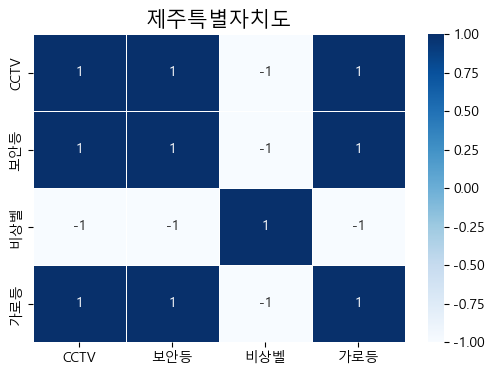

In [52]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('세종특별자치시')
plot_gw = plot_gw.set_title('제주특별자치도', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_jj.png')

In [53]:
# ['충청남도', '충청북도']

In [54]:
# 충청남도
df_gw = df_security_concat.loc[df_security_concat.state == '충청남도']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
245,공주시,1503,4313,76,9
246,금산군,608,8764,28,-4
247,논산시,1196,14236,144,-4
248,당진시,2392,9794,51,34
249,보령시,756,11057,37,44
250,부여군,497,11640,-3,10
251,서산시,1080,13079,728,100
252,서천군,873,11319,77,-4
253,아산시,3125,24098,1,47
254,예산군,482,4302,40,-4


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\3639498401.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


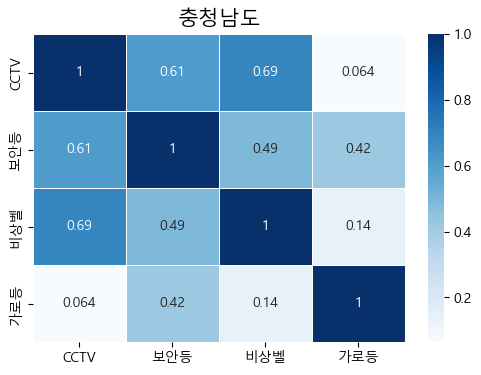

In [55]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('세종특별자치시')
plot_gw = plot_gw.set_title('충청남도', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_cn.png')

In [56]:
# ['충청북도']

In [57]:
# 충청북도
df_gw = df_security_concat.loc[df_security_concat.state == '충청북도']
# df_gw.state.unique()
# df_gw
df_gw = df_gw[['city', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'strlamp_cnt']]

# 칼럼명 변경
dict_rename = {'cctv_cnt':'CCTV', 'sclight_cnt':'보안등', 'smalight_cnt':'비상벨', 'strlamp_cnt':'가로등'}
df_gw.rename(columns=dict_rename, inplace=True)
df_gw

,city,CCTV,보안등,비상벨,가로등
265,괴산군,640,3,-3,-4
266,단양군,287,1499,21,-4
267,보은군,316,6349,99,-4
268,영동군,1,6076,-3,-4
269,옥천군,333,9941,112,-4
270,음성군,4500,21397,353,-4
271,제천시,979,9024,314,-4
272,증평군,910,3869,8,-4
273,진천군,692,2,-3,121
274,청주시,9,25432,-3,-4


C:\Users\samsung\AppData\Local\Temp\ipykernel_15848\1705537237.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수


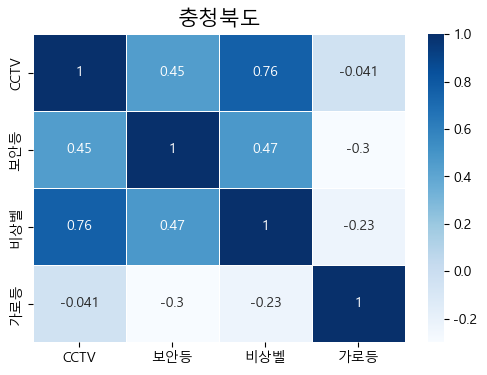

In [58]:
# seaborn을 이용한 히트맵 그리기 (Heatmap by seaborn)
plt.rcParams['figure.figsize'] = [6, 4]
plot_gw = sns.heatmap(df_gw.corr(),  # 상관계수
            annot = True,  # 상관계수 숫자 삽입
            annot_kws = {'size': 10},  # 상관계수 숫자 글자 크기
            cmap = 'Blues',  # 색상 팔레트 지정
            linewidths = 0.5)  # cell 사이 선 삽입

# plt.title('세종특별자치시')
plot_gw = plot_gw.set_title('충청북도', fontsize=15)
plot_gw.get_figure().savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_cb.png')

#### 시도별 그래프 하나로 합치기

['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']

In [60]:
from PIL import Image

In [61]:
## 이미지 불러오기
imgs = ['gw', 'gg', 'gn', 'gb', 'gj', 'dg', 'dj', 'bs', 's', 'sj', 'us', 'ic', 'jn', 'jb', 'jj', 'cn', 'cb',]

for i in range(len(imgs)):
    name = imgs[i]
    globals()['img_{}'.format(name)] = Image.open(f'C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_{name}.png')
# img_gg

In [ ]:
# # '강원도'
# gw = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_gw.png')
# # '경기도'
# gg = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_gg.png')
# # '경상남도'
# gn = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_gn.png')
# # '경상북도'
# gb = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_gb.png')
# # '광주광역시'
# gj = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_gj.png')
# # '대구광역시' 
# dg = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_dg.png')
# # '대전광역시'
# dj = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_dj.png')
# # '부산광역시'
# bs = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_bs.png')
# # '서울특별시'
# s = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_s.png')
# # '세종특별자치시'
# sj = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_sj.png')
# # '울산광역시'
# us = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_us.png')
# # '인천광역시'
# ic = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_ic.png')
# # '전라남도'
# jn = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_jn.png')
# # '전라북도'
# jb = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_jb.png')
# # '제주특별자치도'
# jj = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_jj.png')
# # '충청남도'
# cn = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_cn.png')
# # '충청북도'
# cb = Image.open('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/hm_cb.png')

In [62]:
# 새로운 이미지 생성
img_size = img_gg.size
# img_size  # (600, 400)
hm_concat = Image.new('RGB', (2*img_size[0], 2*img_size[1]), (250,250,250))

# ['gw', 'gg', 'gn', 'gb', 'gj', 'dg', 'dj', 'bs', 's', 'sj', 'us', 'ic', 'jn', 'jb', 'jj', 'cn', 'cb',]

# 이미지 붙여넣기
# 1차
hm_concat.paste(img_gw, (0,0))
hm_concat.paste(img_gg, (img_size[0],0))
hm_concat.paste(img_gn, (1, img_size[1]))
hm_concat.paste(img_gb, (img_size[0], img_size[1]))

hm_concat.save("C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/merge_hm_1.jpg","JPEG")

# 2차
hm_concat2 = Image.new('RGB', (2*img_size[0], 2*img_size[1]), (250,250,250))

hm_concat2.paste(img_gj, (0,0))
hm_concat2.paste(img_dg, (img_size[0],0))
hm_concat2.paste(img_dj, (1, img_size[1]))
hm_concat2.paste(img_bs, (img_size[0], img_size[1]))

hm_concat2.save("C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/merge_hm_2.jpg","JPEG")

# 3차
hm_concat3 = Image.new('RGB', (2*img_size[0], 2*img_size[1]), (250,250,250))

hm_concat3.paste(img_s, (0,0))
hm_concat3.paste(img_sj, (img_size[0],0))
hm_concat3.paste(img_us, (1, img_size[1]))
hm_concat3.paste(img_ic, (img_size[0], img_size[1]))

hm_concat3.save("C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/merge_hm_3.jpg","JPEG")

# 4차
hm_concat4 = Image.new('RGB', (2*img_size[0], 2*img_size[1]), (250,250,250))

hm_concat4.paste(img_jn, (0,0))
hm_concat4.paste(img_jb, (img_size[0],0))
hm_concat4.paste(img_jj, (1, img_size[1]))
hm_concat4.paste(img_cn, (img_size[0], img_size[1]))

hm_concat4.save("C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/merge_hm_4.jpg","JPEG")

# 5차
hm_concat5 = Image.new('RGB', (2*img_size[0], 2*img_size[1]), (250,250,250))

hm_concat5.paste(img_cb, (img_size[0],0))
hm_concat5.save("C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/merge_hm_5.jpg","JPEG")

In [ ]:
# 최종 합치기
# !pip install opencv-python
# import cv2

In [63]:
## 이미지 불러오기
for i in range(1, 6):
    globals()['merge_hm_{}'.format(i)] = Image.open(f'C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/merge_hm_{i}.jpg')
# merge_hm_1

In [ ]:
hm_concat_final_1 = Image.new('RGB', (2*merge_hm_1.size[0], 2*merge_hm_1.size[1]), (250,250,250))

hm_concat4.paste(img_jn, (0,0))
hm_concat4.paste(img_jb, (img_size[0],0))
hm_concat4.paste(img_jj, (1, img_size[1]))
hm_concat4.paste(img_cn, (img_size[0], img_size[1]))

hm_concat4.save("C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/heatmap/merge_hm_4.jpg","JPEG")


In [ ]:
# 옆으로 합치기
# merge_row_1 = np.hstack((merge_hm_1, merge_hm_2))
# cv2.imshow('merge_row_1', merge_row_1)
# cv2.waitKey()

### 2) 요소별 heatmap
* 전국 단위 heatmap